#### seting 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib
from IPython.display import set_matplotlib_formats

matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

#### load dataset

In [3]:
# user_info.csv
user_info = pd.read_csv("data/user_info.csv")

print(user_info.shape)
user_info.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [4]:
# shop_info.csv
shop_info = pd.read_csv("data/shop_info.csv")

print(shop_info.shape)
shop_info.head()

(200, 5)


,shop_id,name,category,age,style
0,1,Edna,의류,20대 중반/20대 후반/30대 초반,모던시크/러블리
1,2,Pam,의류,20대 중반/20대 후반/30대 초반,러블리/심플베이직
2,3,Carolyn,의류,20대 중반/20대 후반/30대 초반,모던시크/심플베이직
3,4,Joan,의류,30대 초반/30대 중반,미시스타일/유니크
4,5,Florene,의류,20대 중반/20대 후반/30대 초반,심플베이직/헐리웃스타일


In [5]:
# goods_info.csv 
goods_info = pd.read_csv("data/goods_info.csv")

print(goods_info.shape)
goods_info.head()

(7188, 8)


,goods_id,timestamp,shop_id,category,price,image_type,image_width,image_height
0,1,2017-01-03 17:15:47.095,153,상의,17000,jpg,500,500
1,2,2017-01-05 19:00:05.126,11,악세사리,268000,gif,270,360
2,3,2017-01-16 16:34:12.717,86,란제리&파자마,22000,jpg,500,666
3,4,2017-01-18 18:35:54.200,53,란제리&파자마,24800,gif,280,380
4,5,2017-01-21 17:09:08.954,60,스커트,29000,jpg,330,235


In [6]:
# order_info.csv
order_info = pd.read_csv("data/order_info.csv")

print(order_info.shape)
order_info.head()

(867, 5)


,timestamp,user_id,goods_id,shop_id,price
0,2018-06-11 00:00:43.032,bvu0aLTqiFDoU-963xnr5nzQWTNLUMjx,1414,38,45000
1,2018-06-11 00:02:33.763,smDmRnykg61KajpxXKzQ0oNkrh2nuSBj,1351,12,9500
2,2018-06-11 00:04:06.364,EyGjKYtSqZgqJ1ddKCtH5XwGirTyOH2P,646,14,22000
3,2018-06-11 00:04:17.258,KQBGi33Zxh5Dgu0WEkOkjN0YqTT_wxC3,5901,46,29800
4,2018-06-11 00:05:26.010,lq1Je3voA3a0MouSFba3629lKCvweI24,5572,89,29000


In [7]:
# user_event_logs.csv
user_event_logs = pd.read_csv("data/user_event_logs.csv")

print(user_event_logs.shape)
user_event_logs.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


### 1. 운영팀이 사용자의 정보를 빠르게 확인할 수 있도록 가능한 모든 상세 정보를 출력하세요.

운영팀(일명 CS팀)에서 가장 많이 필요로 하는 기능은 CS채널(이메일, 전화 등)을 통해 고객의 요청이 들어왔을 때, 해당 고객에 대한 가능한 모든 정보를 빠르게 색인하는 것입니다.

가령 어떤 고객이 전화를 통해 중복 구매한 상품에 대해 환불 요청을 했다고 가정하겠습니다. 이 경우 CS팀에서는 그 고객이 해당 상품을 중복 구매한 것이 맞는지를 먼저 확인해야 합니다. 또는 어떤 고객이 어플리케이션이 제대로 동작하지 않는다는 문의를 했다면, 해당 사용자가 문의를 준 시간을 기준으로 최근까지의 모든 활동 내역을 출력할 수 있어야 합니다.

그런 의미에서 특정 사용자의 아이디를 집어넣으면, 해당 사용자의 가능한 모든 정보를 일괄로 변환하는 함수를 만들도록 하겠습니다. 이 함수에는 다음의 기능이 들어가야 합니다.

1. 해당 사용자의 기본 정보(연령대 등)를 볼 수 있어야 합니다.
2. 해당 사용자가 구매한 모든 상품의 구매 내역을 볼 수 있어야 합니다.
3. 특정 날짜/시간을 기준으로 해당 사용자의 최근 활동 내역 (페이지 방문, 즐겨찾기 등)을 전부 볼 수 있어야 합니다.


In [8]:
def find_user(user_id, finish = 'today'):
# basic
    basic_info = user_info.set_index("user_id")
    basic = basic_info.loc[[user_id]]

# order
    new_info = user_info.merge(order_info,
                               left_on="user_id",
                               right_on="user_id",
                               how="right").merge(shop_info,
                                                  left_on="shop_id",
                                                  right_on="shop_id",
                                                  how="left").merge(
                                                      goods_info,
                                                      left_on="goods_id",
                                                      right_on="goods_id",
                                                      how="left")
    old_col = [
        "user_id", "timestamp_x", "age_x", "name", "category_x", "category_y",
        "price_x"
    ]
    new_col = [
        "user_id", "timestamp", "user_age", "shop_name", "category(shop)",
        "category(goods)", "price"
    ]
    new_info = new_info[old_col]
    new_info.columns = new_col
    new_info["timestamp"] = pd.to_datetime(new_info["timestamp"])
    select_user = new_info["user_id"] == user_id
    order = new_info[select_user].loc[:, new_info.columns != "user_id"]
    order = order[order["timestamp"] < finish]
    order.reset_index(drop=True, inplace=True)

# logs
    log_info = new_info.merge(user_event_logs,
                              left_on="user_id",
                              right_on="user_id",
                              how="left")
    log_old_col = [
        "user_id", "timestamp_y", "event_origin", "event_name", "user_age",
        "shop_name", "category(shop)", "category(goods)", "price"
    ]
    log_new_col = [
        "user_id", "timestamp", "event_origin", "event_name", "user_age",
        "shop_name", "category(shop)", "category(goods)", "price"
    ]
    log_info = log_info[log_old_col]
    log_info.columns = log_new_col
    log_info["timestamp"] = pd.to_datetime(log_info["timestamp"])
    select_log = log_info["user_id"] == user_id
    logs = log_info[select_log].loc[:, log_info.columns != "user_id"]
    logs = logs[logs["timestamp"] < finish]
    logs.reset_index(drop=True, inplace=True)

# 종합 정보 출력
    print("Basic information")
    display(basic)
    print("Orders")
    display(order)
    print("Histories")
    display(logs)

    return basic, order, logs

In [9]:
user_id = "gni976f7oJAqbJCoOd9N7pupYq43qujw"

In [10]:
profile, orders, logs = find_user(user_id, finish = 'today')

Basic information


,os,age
user_id,,
gni976f7oJAqbJCoOd9N7pupYq43qujw,iOS,33


Orders


,timestamp,user_age,shop_name,category(shop),category(goods),price
0,2018-06-11 23:22:14.971,33,Delmy,의류,원피스,24800


Histories


,timestamp,event_origin,event_name,user_age,shop_name,category(shop),category(goods),price
0,2018-06-11 10:47:09.669,my_goods,app_page_view,33,Delmy,의류,원피스,24800
1,2018-06-11 16:26:59.993,my_goods,enter_browser,33,Delmy,의류,원피스,24800
2,2018-06-11 16:27:01.604,my_goods,app_page_view,33,Delmy,의류,원피스,24800
3,2018-06-11 16:27:08.223,my_goods,enter_browser,33,Delmy,의류,원피스,24800
4,2018-06-11 16:27:30.587,my_goods,app_page_view,33,Delmy,의류,원피스,24800
5,2018-06-11 16:29:27.990,my_goods,enter_browser,33,Delmy,의류,원피스,24800
6,2018-06-11 21:03:51.011,my_goods,app_page_view,33,Delmy,의류,원피스,24800
7,2018-06-11 21:38:25.108,my_goods,enter_browser,33,Delmy,의류,원피스,24800
8,2018-06-11 21:52:52.574,my_goods,app_page_view,33,Delmy,의류,원피스,24800
9,2018-06-11 21:52:55.766,my_goods,enter_browser,33,Delmy,의류,원피스,24800


In [11]:
profile

,os,age
user_id,,
gni976f7oJAqbJCoOd9N7pupYq43qujw,iOS,33


In [12]:
orders

,timestamp,user_age,shop_name,category(shop),category(goods),price
0,2018-06-11 23:22:14.971,33,Delmy,의류,원피스,24800


In [13]:
logs.head()

,timestamp,event_origin,event_name,user_age,shop_name,category(shop),category(goods),price
0,2018-06-11 10:47:09.669,my_goods,app_page_view,33,Delmy,의류,원피스,24800
1,2018-06-11 16:26:59.993,my_goods,enter_browser,33,Delmy,의류,원피스,24800
2,2018-06-11 16:27:01.604,my_goods,app_page_view,33,Delmy,의류,원피스,24800
3,2018-06-11 16:27:08.223,my_goods,enter_browser,33,Delmy,의류,원피스,24800
4,2018-06-11 16:27:30.587,my_goods,app_page_view,33,Delmy,의류,원피스,24800


In [14]:
# 여기서 특정 시간을 지정해서, 이 시간 이전의 기록만 가져올 수 있습니다.
finish = pd.to_datetime("2018-06-11 18:00:00")

# 이렇게 하면 오후 6시 이전의 모든 구매 정보, 서비스 이용 내역은 배제하고 출력합니다.
profile, orders, logs = find_user(user_id, finish = finish)

Basic information


,os,age
user_id,,
gni976f7oJAqbJCoOd9N7pupYq43qujw,iOS,33


Orders


,timestamp,user_age,shop_name,category(shop),category(goods),price


Histories


,timestamp,event_origin,event_name,user_age,shop_name,category(shop),category(goods),price
0,2018-06-11 10:47:09.669,my_goods,app_page_view,33,Delmy,의류,원피스,24800
1,2018-06-11 16:26:59.993,my_goods,enter_browser,33,Delmy,의류,원피스,24800
2,2018-06-11 16:27:01.604,my_goods,app_page_view,33,Delmy,의류,원피스,24800
3,2018-06-11 16:27:08.223,my_goods,enter_browser,33,Delmy,의류,원피스,24800
4,2018-06-11 16:27:30.587,my_goods,app_page_view,33,Delmy,의류,원피스,24800
5,2018-06-11 16:29:27.990,my_goods,enter_browser,33,Delmy,의류,원피스,24800


### 2. 시간당 매출의 변화량을 구하는 그래프를 출력하기

대시보드에서 가장 먼저 보고 싶은 시각화는 서비스의 매출, 그것도 시간당 매출의 변화량입니다. 지그재그와 같은 전자상거래 스타트업에서 서비스의 매출과 판매량을 실시간으로 확인하는 것은 다른 무엇보다도 중요합니다. 그런 의미에서 시간당 매출의 변화량을 시각화하는 ```plot_sales```라는 함수를 구현하고 싶습니다.

![dashboard](http://drive.google.com/uc?export=view&id=1zdtfYbYz0WtHIAq8v152QzQxAqDHsPHH)
<center><small><b>시간당 매출의 변화량을 알 수 있는 그래프입니다. 시각화는 일명 stacked barplot이라는 개념을 사용하였습니다.</b></small></center>
<center><small><b>X축은 시간(0시 ~ 23시)이며, Y축은 매출입니다. 그리고 특정 쇼핑몰이나 카테고리, 연령대마다 다른 컬러를 줄 수 있습니다.</b></small></center>
<center><small><b>(위 시각화는 연령대별로 다른 컬러값을 주었습니다)</b></small></center>

이 ```plot_sales``` 함수에는 추가로 다음의 옵션이 들어갑니다.

  * ```by```: 상품을 구분하는 기준이 되는 옵션입니다. 크게 1) category(상품의 카테고리. 상의, 바지, 원피스 등), 2) shop(상품을 판매하는 쇼핑몰. Norma, Edie, Marie 등), 3) Age(구매자의 나이, 10대 20대 30대 등) 중에 하나를 선택할 수 있습니다.
  * ```num_class```: 상품을 구분하는 기준이 여러 개일 경우, 상위 N개를 선택하는 옵션입니다. 가령 num_class가 5라면 상위 5개를 제외한 나머지는 '기타'로 묶어서 시각화합니다.
  * ```sort```: 정렬 여부입니다. True/False 중 하나가 들어가며, True를 넣으면 매출이 높은 순으로 정렬하고 False를 넣으면 아예 정렬하지 않습니다.
  * ```cumulative```: 통계를 누적해서 보여줄지(True), 누적해서 보여주지 않을지(False)를 선택합니다.
  * ```figsize```: 그래프의 가로X세로를 정할 수 있습니다. 가령 (18, 8)이면 가로 18, 세로 8로 출력합니다. (기본값은 (18, 8) 입니다)


In [15]:
def plot_sales(by, num_class, sort=True, cumulative=False, figsize=(18, 8)):
# 데이터 병합과 클리닝
    order_goods = order_info.merge(goods_info,
                                   left_on="goods_id",
                                   right_on="goods_id",
                                   how="left").merge(shop_info,
                                                     left_on="shop_id_x",
                                                     right_on="shop_id",
                                                     how="left").merge(
                                                         user_info,
                                                         left_on="user_id",
                                                         right_on="user_id",
                                                         how="left")
    old_col = [
        "timestamp_x", "name", "age_y", "goods_id", "shop_id_x", "category_x",
        "price_x"
    ]
    new_col = [
        "timestamp", "shop", "age", "goods_id", "shop_id", "category", "price"
    ]
    order_goods = order_goods[old_col]
    order_goods.columns = new_col
    order_goods["timestamp"] = pd.to_datetime(order_goods["timestamp"])
    order_goods["timestamp(hour)"] = order_goods["timestamp"].dt.hour

    def make_generation(age):
        if age <= 0:
            return np.nan
        elif age >= 45:
            return "45+"
        else:
            return str(age // 10 * 10) + f".0"

    order_goods["age"] = order_goods["age"].map(make_generation)

# 옵션 상위품목을 재외한 나머지는 기타로 분류
    def top_rank(category):
        rank = order_goods.groupby(by).sum()["price"].rank(
            ascending=False).sort_values()[:num_class].index

        if category not in rank:
            return "기타"
        else:
            return category

    order_goods[by] = order_goods[by].apply(top_rank)
    order_goods.loc[order_goods["age"] == "기타", "age"] = np.nan
    
# 그룹핑을 위한 피벗테이블
    test = order_goods.pivot_table(index="timestamp(hour)",
                                   columns=by,
                                   values="price",
                                   aggfunc=np.sum).fillna(0)
    
# sort 옵션 정렬
    sort_price = test.sum()
    test = test.T
    test["price(sum)"] = sort_price
    if sort == True:
        test = test.sort_values("price(sum)").T.drop("price(sum)")
    else:
        test = test.T.drop("price(sum)")
        
# 최종 시각화
    if cumulative == False:
        sns.set_palette("Set2")
        last_bar = test.plot.bar(stacked=True, rot=0, figsize=figsize)
        plt.legend(loc=1, bbox_to_anchor=(1.1, 1.015))
    else:
        sns.set_palette("Set2")
        last_bar = test.cumsum().plot.bar(stacked=True, rot=0, figsize=figsize)
        plt.legend(loc=1, bbox_to_anchor=(1.1, 1.015))
    return last_bar

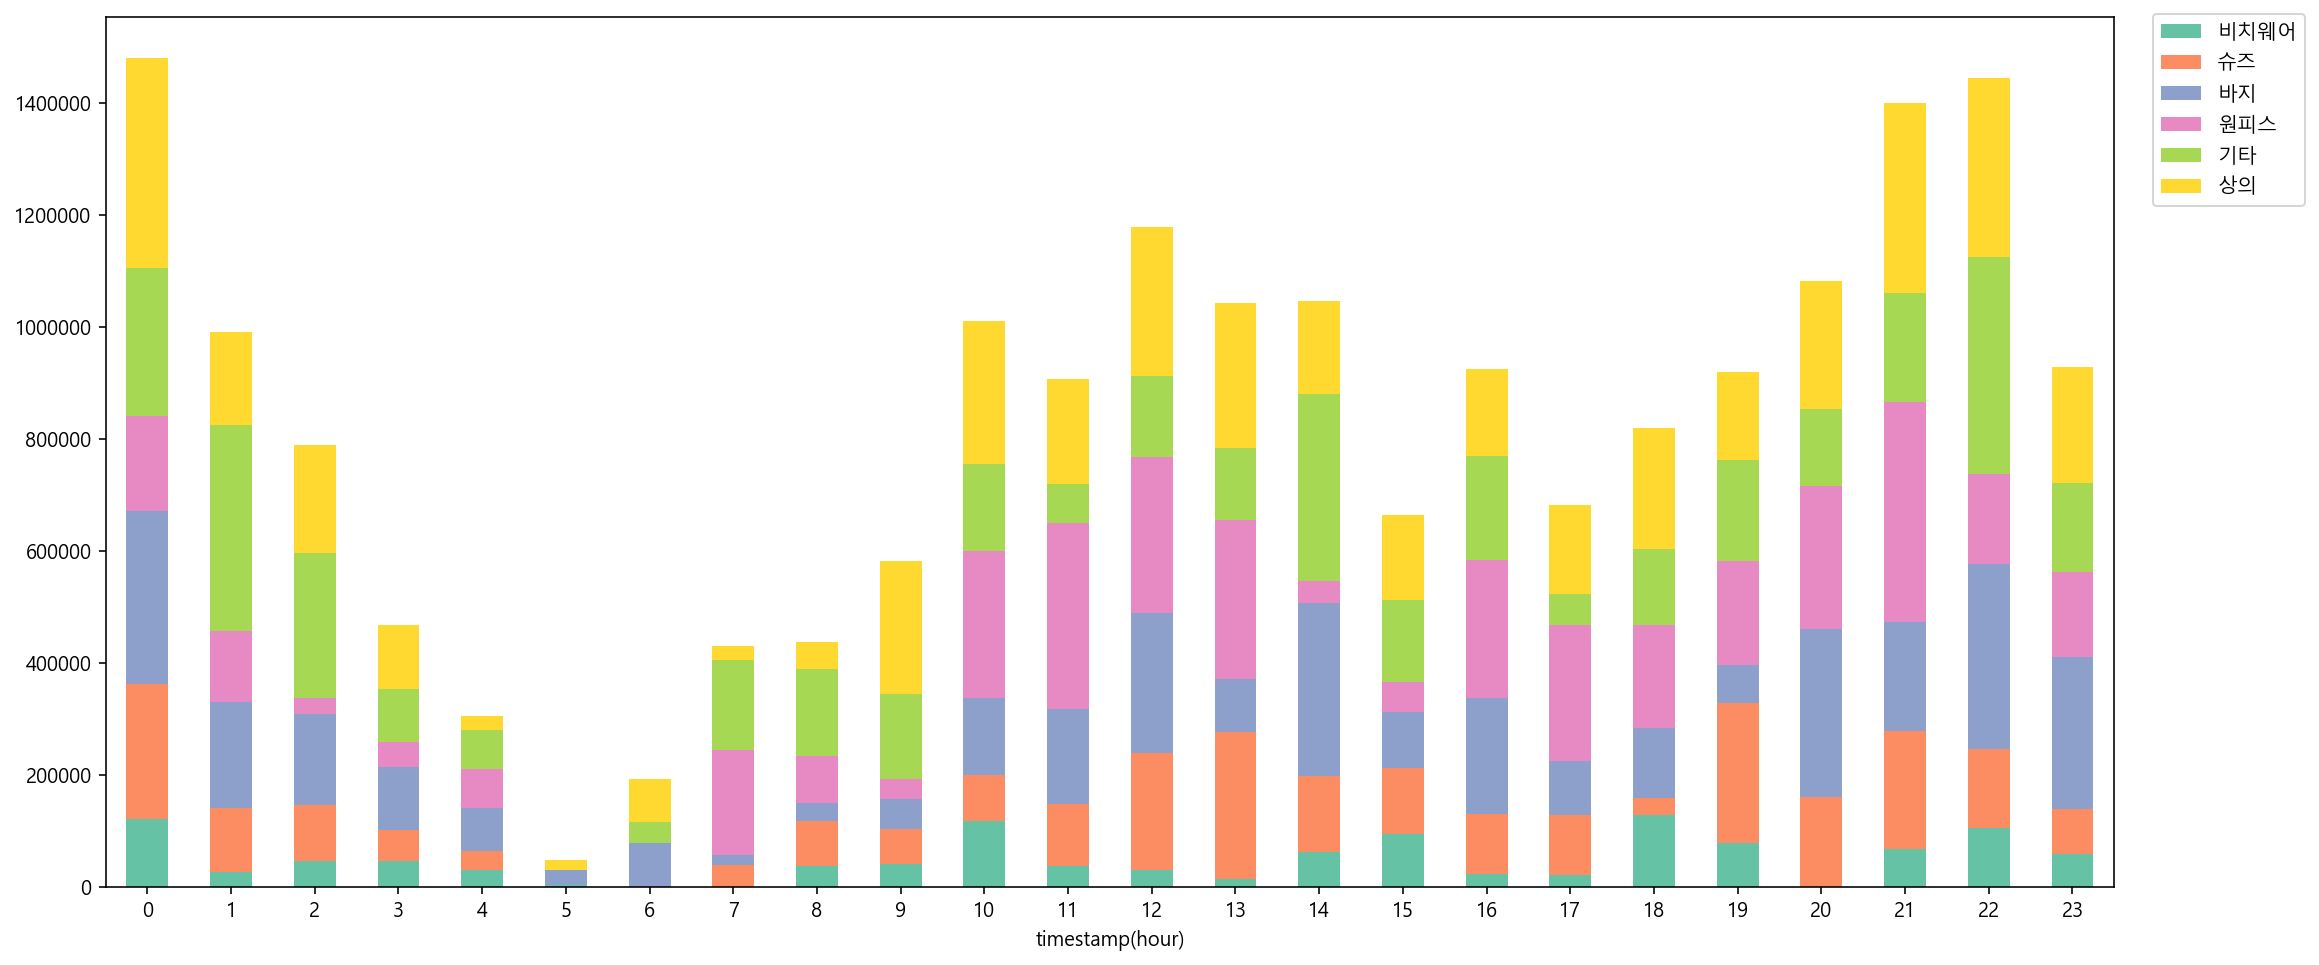

In [16]:
plot_sales(by = 'category',
           num_class = 5,
           sort = True,
           cumulative = False)

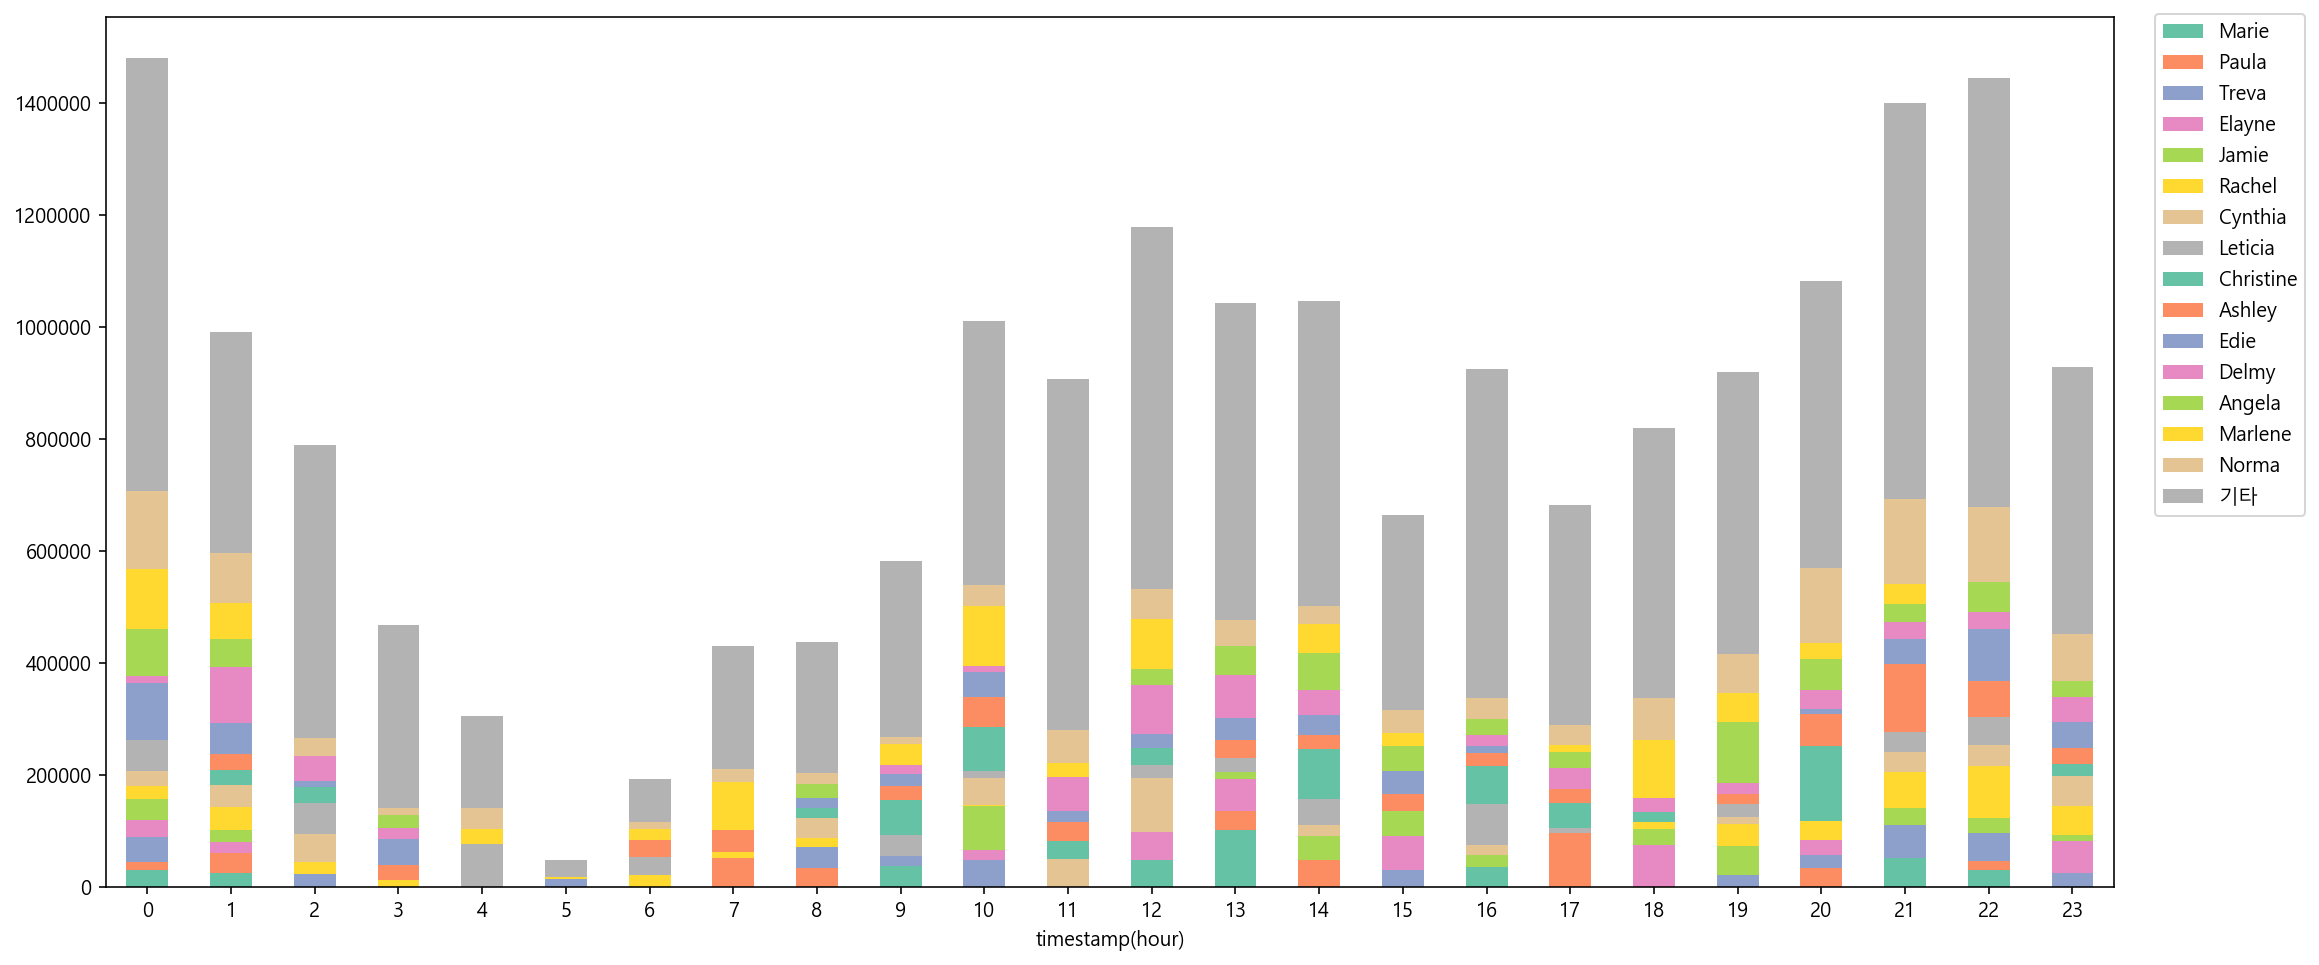

In [17]:
plot_sales(by = 'shop',
           num_class = 15,
           sort = True,
           cumulative = False)

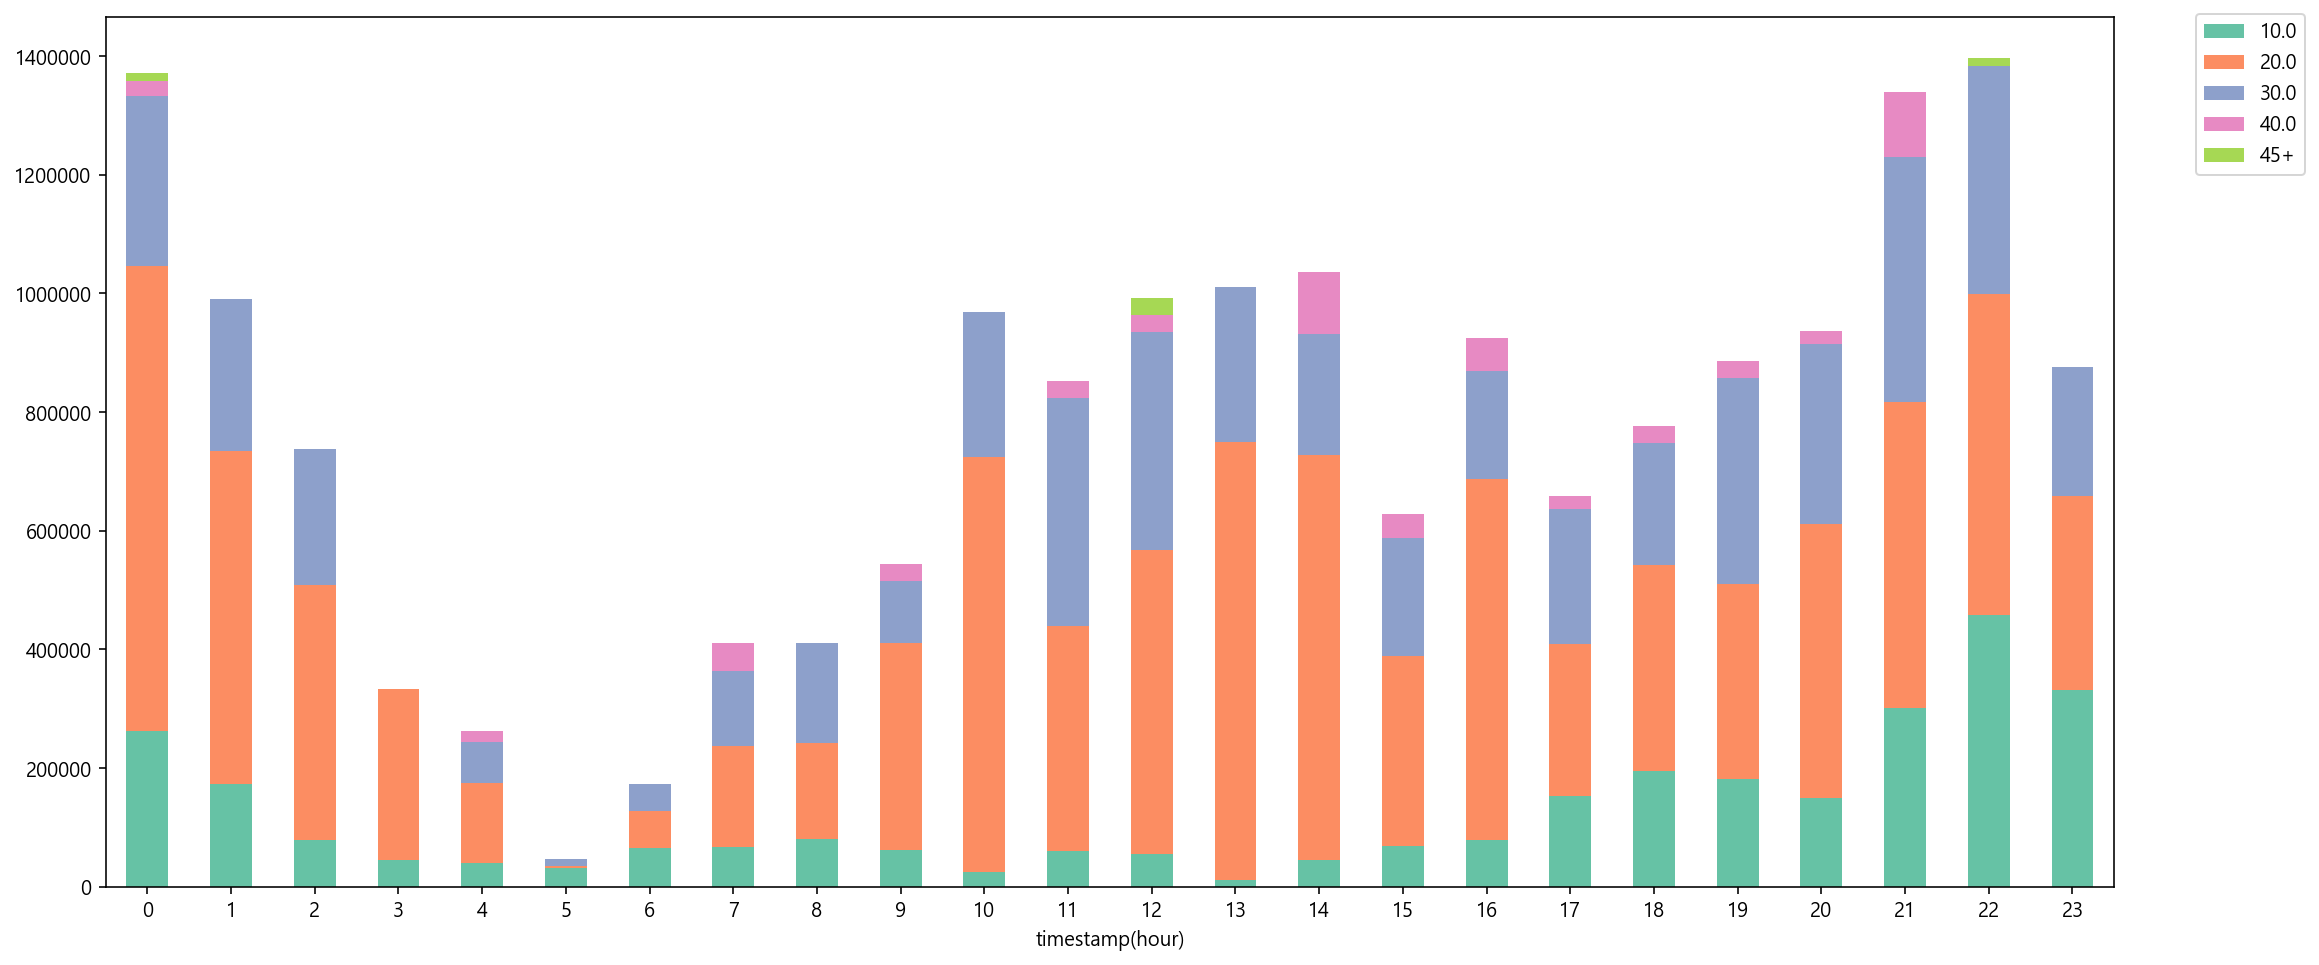

In [18]:
plot_sales(by = 'age',
           num_class = None,
           sort = False,
           cumulative = False)

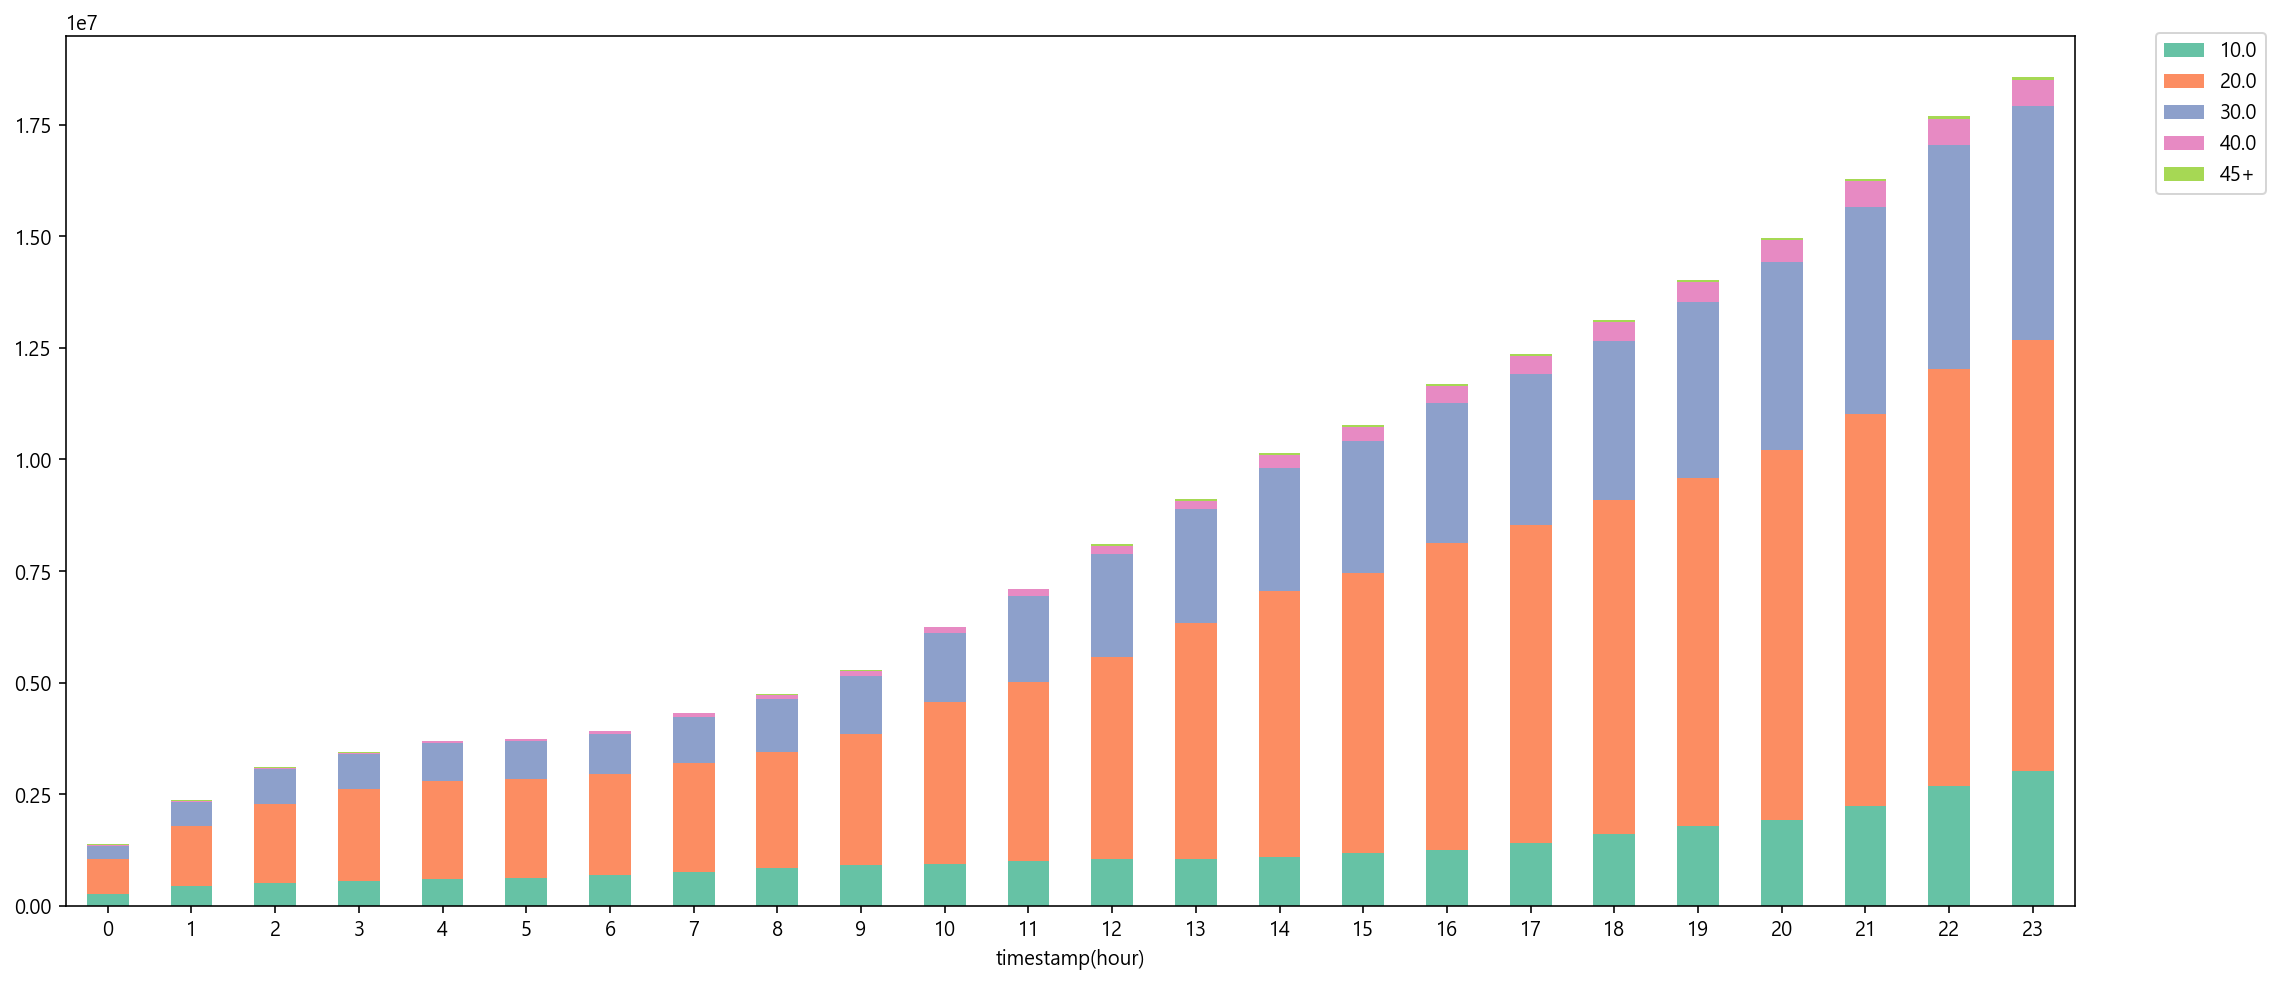

In [19]:
plot_sales(by = 'age',
           num_class = None,
           sort = False,
           cumulative = True)

### 3. 특정 쇼핑몰 또는 상품 카테고리만을 시각화하는 그래프를 구현하기

이 다음 보고 싶은 그래프는 시간별 / 나이별 상품의 판매 현황입니다. 여기에 추가로 특정 쇼핑몰 또는 상품 카테고리마다 다르게 시각화를 하고 싶습니다. 예시는 다음과 같습니다.

![dashboard](http://drive.google.com/uc?export=view&id=1T5ApvOMMMT7xGjs_n6ZB0pDDGvp9idOz)
<center><small><b>X축은 0시부터 24시, (0분 ~ 1,440분) Y축은 상품을 구매한 고객의 나이를 나타냅니다.</b></small></center>
<center><small><b>동그라미는 고객이 물건을 구매했다는 사실을 나타냅니다. 동그라미미의 크기가 클수록 더 비싼 상품을 구매했다고 볼 수 있습니다.</b></small></center>
<center><small><b>또한 특정 쇼핑몰(Norma, Edie, Angela)이나 상품 카테고리(원피스, 상의, 바지)를 지정하여 강조할 수 있습니다.</b></small></center>


이 그래프를 통해 지그재그의 구성원들은 상품 판매 현황에 대한 다양한 정보를 알 수 있습니다. 가령

  * 연령대별로 상품을 구매하는 시기와 구매하지 않는 시기를 파악할 수 있습니다. 가령 10대 고객의 경우 오전 10시부터 오후 4시까지는 구매가 일어나지 않는 것을 확인할 수 있습니다. (아마도 학교에서 수업을 듣는 중이겠죠) 그리고 연령에 상관없이 모든 고객들이 오전 3시부터 오전 6시까지는 상품을 구매하지 않는 사실을 알 수 있습니다. (아마도 자는 중이라고 판단할 수 있습니다)
  * 특정 쇼핑몰이나 특정 상품 카테고리만 강조하여, 다른 것들과의 차이를 비교할 수 있습니다. 가령 위의 시각화에서는 Norma라는 이름의 쇼핑몰은 상대적으로 젊은 연령대(20대 초반)에서 구매가 많이 일어나고, Angela라는 이름의 쇼핑몰은 이보다 높은 연령대에서 구매가 많이 일어난다는 사실을 알 수 있습니다.
  
그러므로 시간별 / 나이별 상품의 판매 현황을 확인할 수 있는 ```plot_sales_by_age```라는 함수를 구현하겠습니다. 이 함수에는 다음의 옵션이 추가로 들어갑니다.

  * ```query```: 특정 상품을 강조하는 기능입니다. 파이썬의 [딕셔너리](https://wikidocs.net/16)가 들어가며, 키(key)는 강조할 값의 종류(쇼핑몰 / 상품 카테고리), 값(value)에는 그 쇼핑몰과 상품 카테고리의 명칭을 넣으면 됩니다.
  * ```figsize```: 그래프의 가로X세로를 정할 수 있습니다. 가령 (18, 6)이면 가로 18, 세로 6로 출력합니다. (기본값은 (18, 6) 입니다)


In [20]:
def plot_sales_by_age(query, figsize = (18, 6)):
# 데이터 병합과 클리닝
    order_goods = order_info.merge(goods_info,
                                   left_on="goods_id",
                                   right_on="goods_id",
                                   how="left").merge(shop_info,
                                                     left_on="shop_id_x",
                                                     right_on="shop_id",
                                                     how="left").merge(
                                                         user_info,
                                                         left_on="user_id",
                                                         right_on="user_id",
                                                         how="left")
    old_col = [
        "timestamp_x", "name", "age_y", "category_x", "price_x"
    ]
    new_col = [
        "timestamp", "shop_name", "age", "category", "price"
    ]
    order_goods = order_goods[old_col]
    order_goods.columns = new_col
    order_goods["timestamp"] = pd.to_datetime(order_goods["timestamp"])
    order_goods["timestamp(period)"] = order_goods["timestamp"].dt.hour * 60 + order_goods["timestamp"].dt.minute

    def make_generation(age):
        if age <= 0:
            return np.nan
        else:
            return age

    order_goods["age"] = order_goods["age"].map(make_generation)
# 딕셔너리 키값과 벨류값 구분
    for k in query.keys():
        k
# 벨류값을 기준으로 강조할 상품만 표시
    def Dictionary(key):
        key_values = query.get(k)

        if key in key_values:
            return key
        else:
            return "-"
    order_goods[k] = order_goods[k].apply(Dictionary)
# 강조할 상품을 재외한 품목은 회색처리
    unique = order_goods[k].unique()
    palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))
    palette.update({'-':'lightgray'})
# 최종 시각화 
    plt.figure(figsize = figsize)
    sns.set_palette("Set2")
    last_scatter = sns.scatterplot(data=order_goods,
               x="timestamp(period)",
               y="age",
               hue = k, 
               size = "price",
               sizes = (15,400),
               alpha = 0.8, palette=palette)
    plt.legend(loc=1, bbox_to_anchor=(1.1, 1.015))
    return last_scatter

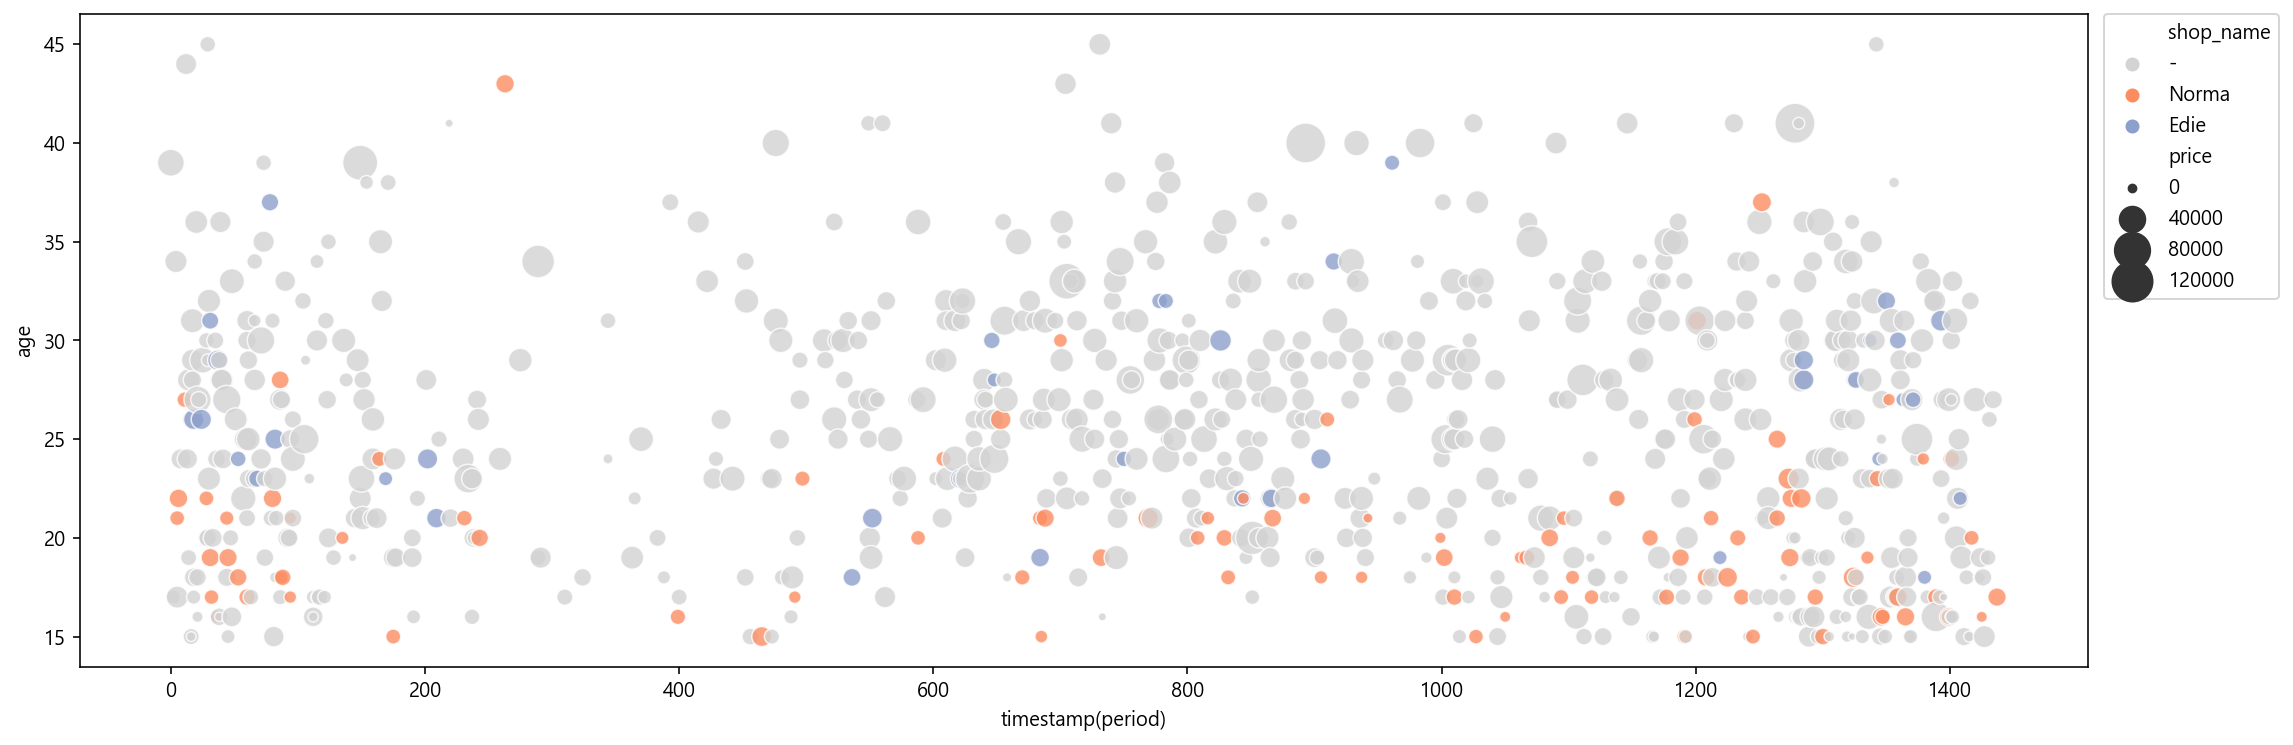

In [21]:
query = {"shop_name": ["Norma", "Edie"]}

plot_sales_by_age(query)

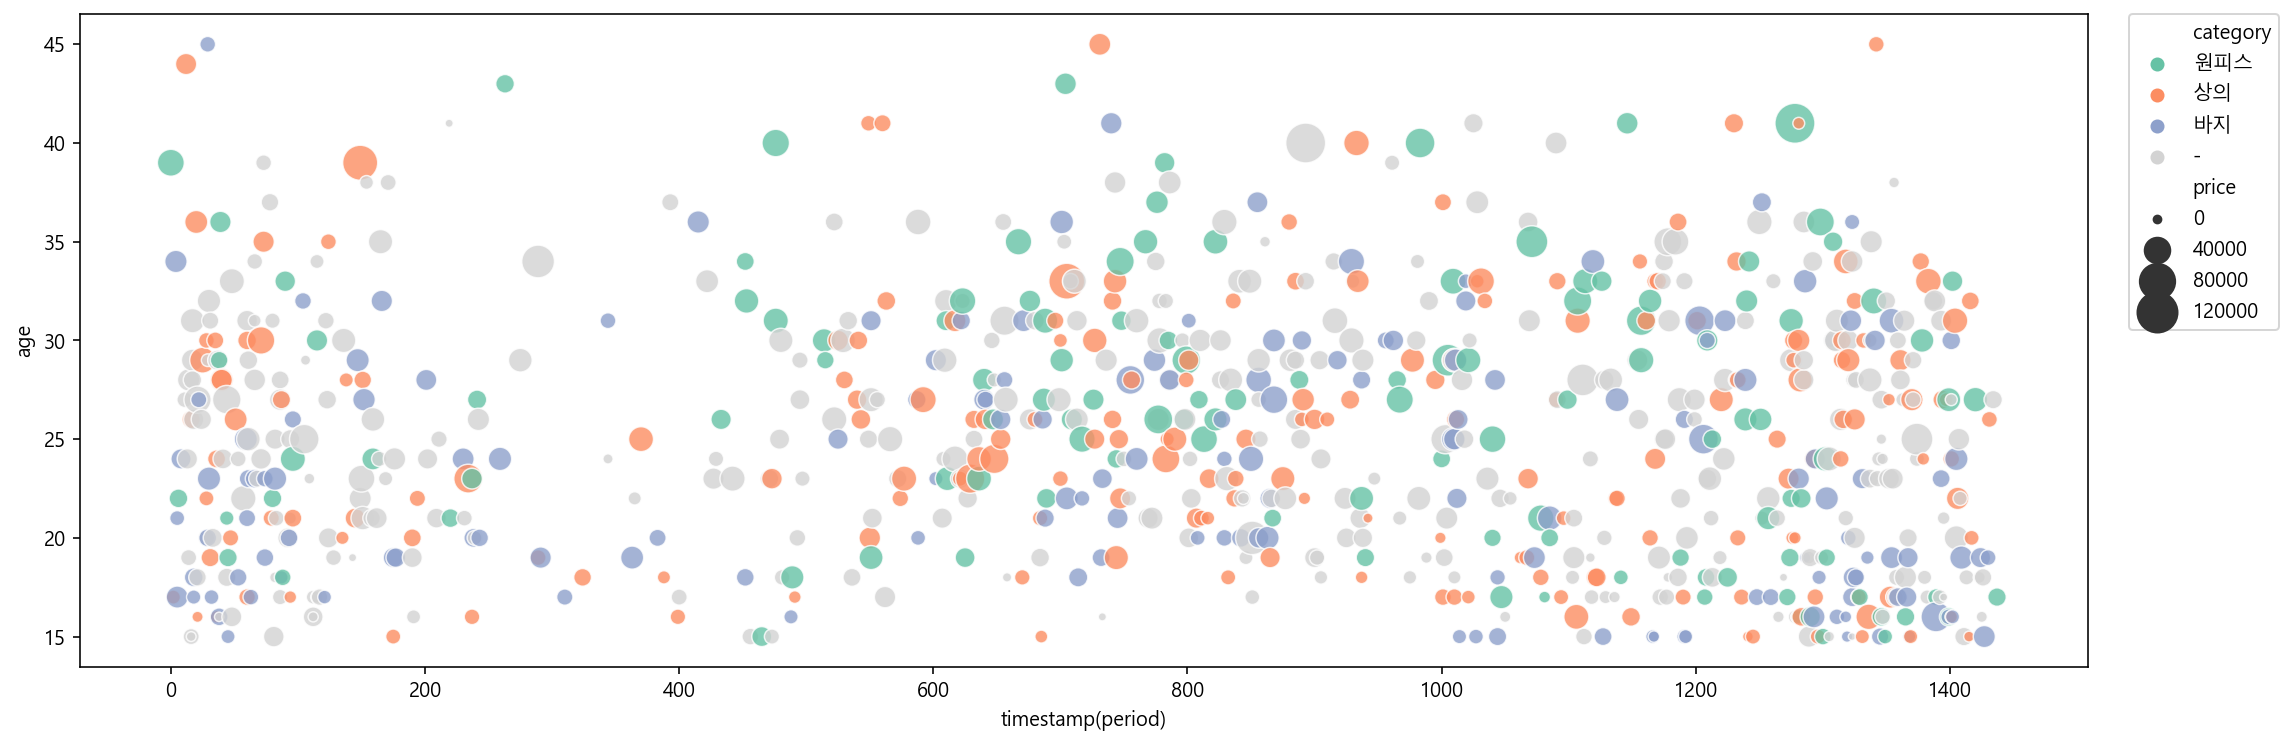

In [22]:
query = {"category": ["원피스", "상의", "바지"]}

plot_sales_by_age(query)

### 4. 자유 주제 - 데이터를 활용하여 자유롭게 시각화를 해주세요.

마지막 문제는 자유 주제입니다. 특정한 형식에 구애받지 않고 자유롭게 데이터 분석과 시각화를 통해 데이터에서 인사이트를 추출해주세요.

지그재그의 데이터에는 아직 우리가 분석하지 않은 미지의 요소들이 있습니다. 몇 가지 예시를 적어보자면 다음과 같습니다.

  * 검색 키워드 분석. 로그의 ```event_origin``` 컬럼에는 ```goods_search_result```, ```category_search_result```이라는 값과 그 검색 키워드가 적혀 있습니다. 이 검색 키워드로 알 수 있는 새로운 정보들이 많을 것입니다.
  * 이탈률 분석. 지그재그의 서비스에 유입한 고객들이 목표(ex: 상품 구매)를 달성하지 못하고 서비스를 이탈하는 상황이 발생할 수 있습니다. 이 현황을 실시간으로 파악할 수 있는 기능을 구현한다면 지그재그의 구성원들에게 큰 도움이 될 것입니다.
  * 로그 분석. 지그재그 데이터의 가장 큰 장점 중 하나는 로그(```user_event_logs.csv```)가 상세히 기록되고 있다는 것입니다. 이 로그를 활용하면 일반적인 쇼핑몰 큐레이션&랭킹 서비스에서는 알 수 없는 새로운 정보를 찾아낼 수 있을 겁니다.

데이터 분석 및 시각화를 하면서 주의할 점은 다음과 같습니다.

  * 데이터 분석 및 시각화에서 가장 경계해야 할 점은, 그림은 예쁘지만 아무런 정보를 얻을 수 없는 시각화를 하는 것입니다. 시각화는 언제나 직관적이어야 하며, 시각화를 통해서 얻을 수 있는 정보나 영감이 있어야 합니다. 이 점을 강조해서 시각화를 할 수 있었으면 합니다.
  * 비슷한 이유로 가장 경계해야 하는 것은, 이미 지그재그 구성원들이 알고 있는 사실을 시각화하는 것입니다. 모든 분석은 이미 알고 있는 정보를 검증하는 용도가 아닌, 아직 발견하지 못한 새로운 정보를 찾아내기 위한 과정이어야 합니다. 그런 의미에서 지그재그의 구성원분들, 내지는 일반적인 쇼핑몰 큐레이션&랭킹 서비스에서는 알 수 없는 새로운 정보를 발견할 수 있으면 좋겠습니다.
  * 분석을 할 때는 언제나 중요한 정보를 중점적으로 분석하고, 중요하지 않은 정보는 분석 우선순위에서 미루거나 제외하는 것이 좋습니다. 가령 굳이 예를 들자면 상품의 이미지 타입(```image_type```)과 가로X세로(```image_width```X```image_height```)는 중요하지 않을 가능성이 높습니다. 이런 정보들을 분석하는 건 후순위로 미루는 걸 추천합니다.

In [23]:
def conversion_rate(search):
# 데이터 클리닝
    order_info["결제상태"] = True
    log_0611 = user_event_logs.merge(user_info,
                                     left_on="user_id",
                                     right_on="user_id",
                                     how="left").merge(order_info,
                                                       left_on="user_id",
                                                       right_on="user_id",
                                                       how="left")
    cols = ["timestamp_x", "user_id", "event_origin", "event_name", "os", "goods_id",
            "shop_id", "price", "결제상태"]
    log_0611 = log_0611[cols]
    log_0611.rename(columns={"timestamp_x": "timestamp"}, inplace=True)
    log_0611["timestamp"] = pd.to_datetime(log_0611["timestamp"])
    log_0611["결제상태"].fillna(False, inplace=True)
# 트래픽 홈페이지 설정
    search_result = log_0611[log_0611["event_origin"].str.contains(search)]
    add_by_search = search_result[search_result["event_name"]
                                  == "add_my_goods"]
    order_by_search = add_by_search[add_by_search["결제상태"] == True]
# 로그페이지에 유입된 총 사용자
    influx_users = log_0611["user_id"].unique()
# 카테고리를 검색한 사용자
# 로그페이지 에서 유입된 사용자 중 카테고리페이지에 유입된 사용자
    search_page_users = search_result.loc[search_result["user_id"].isin(
        influx_users), "user_id"].unique()
# 상품을 장바구니에 추가한 사용자
# 앞 단계에서 유입된 사용자중 장바구니에 상품을 추가한 사용자
    add_page_by_search = add_by_search.loc[add_by_search["user_id"].isin(
        search_page_users), "user_id"].unique()
# 주문을 완료한 사용자
# 앞 단계에서 유입된 사용자중 구매를 완료한 사용자
    order_page_by_search = order_by_search.loc[order_by_search["user_id"].isin(
        add_page_by_search), "user_id"].unique()
# 데이터 프레임화 시키기
    funnel_idx_cat = ['home_page', 'search_page', 'add_my_goods_page',
                      'order_page']
    funnel_data_cat = {
        "number of users": [len(influx_users), len(search_page_users),
                            len(add_page_by_search), len(order_page_by_search)]
    }
    funnel_traffic = pd.DataFrame(funnel_data_cat, index=funnel_idx_cat)
# 각단계 전환율과 총 전환율 구하기
    influx_traffic = funnel_traffic.loc['home_page', 'number of users']
    step_conversion_rate = funnel_traffic['number of users'] / \
        funnel_traffic['number of users'].shift(1).fillna(influx_traffic)
    all_conversion_rate = funnel_traffic['number of users'] / influx_traffic
# 전환율에 대한 데이터
    conversion_rate = round(pd.DataFrame(
        data=[step_conversion_rate, all_conversion_rate]).T, 3)
    conversion_rate.columns = ["step_conversion_rate", "all_conversion_rate"]
    step_conversion_rate_percent = conversion_rate["step_conversion_rate"].apply('{:.1%}'.format)
# 각 퍼널에 대한 정보 표출
    print("funnel info")
    display(funnel_traffic)
    print("conversion info")
    display(conversion_rate)
# 최종 시각화 옵션설정
    def final_plt():
        plt.figure(figsize=(18, 12))
        plt.title("Conversion", fontdict={'fontsize': 15})
        plt.yticks(funnel_traffic['number of users'])
        plt.tick_params(labelsize=15)
# 시각화
        for i in range(funnel_traffic.shape[0]):
            plt.bar(funnel_traffic.index[:i+1],
                    funnel_traffic['number of users'][i])
# 텍스트 추가
        for i in range(funnel_traffic.shape[0]-1):
            plt.text(i+0.5, funnel_traffic['number of users'][i+1] +
                     200, str(step_conversion_rate_percent[i+1]), fontsize=15)
    return final_plt()

funnel info


,number of users
home_page,9909
search_page,2058
add_my_goods_page,215
order_page,41


conversion info


,step_conversion_rate,all_conversion_rate
home_page,1.000,1.000
search_page,0.208,0.208
add_my_goods_page,0.104,0.022
order_page,0.191,0.004


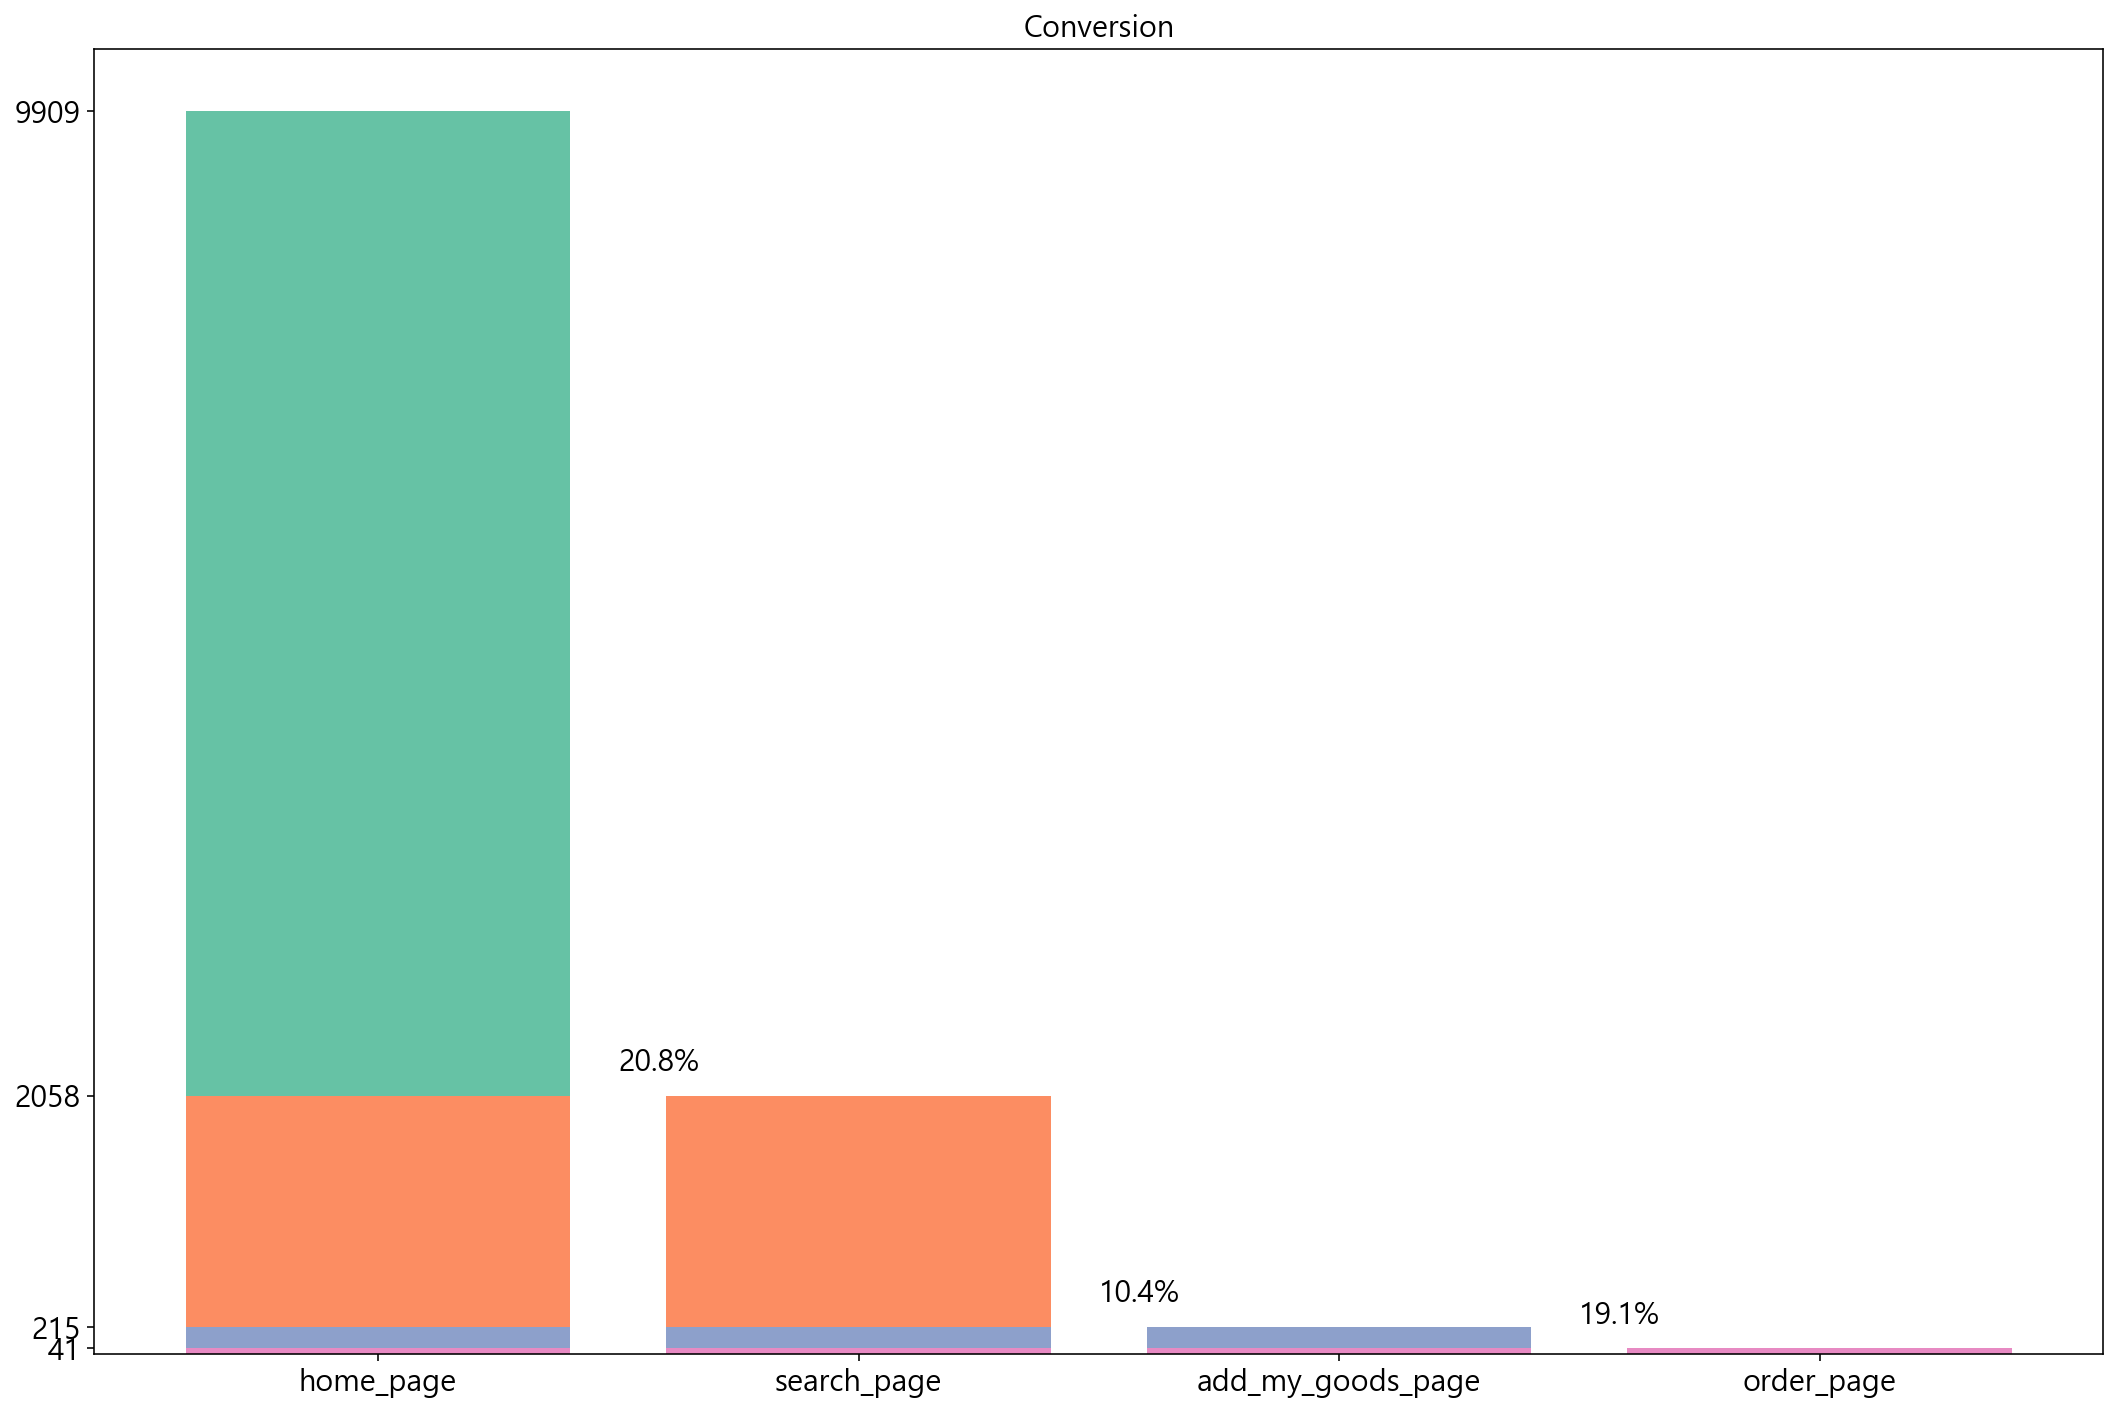

In [24]:
# 카테고리로 검색한 이용자의 구매 전환율
conversion_rate("category_search")

funnel info


,number of users
home_page,9909
search_page,3500
add_my_goods_page,338
order_page,88


conversion info


,step_conversion_rate,all_conversion_rate
home_page,1.000,1.000
search_page,0.353,0.353
add_my_goods_page,0.097,0.034
order_page,0.260,0.009


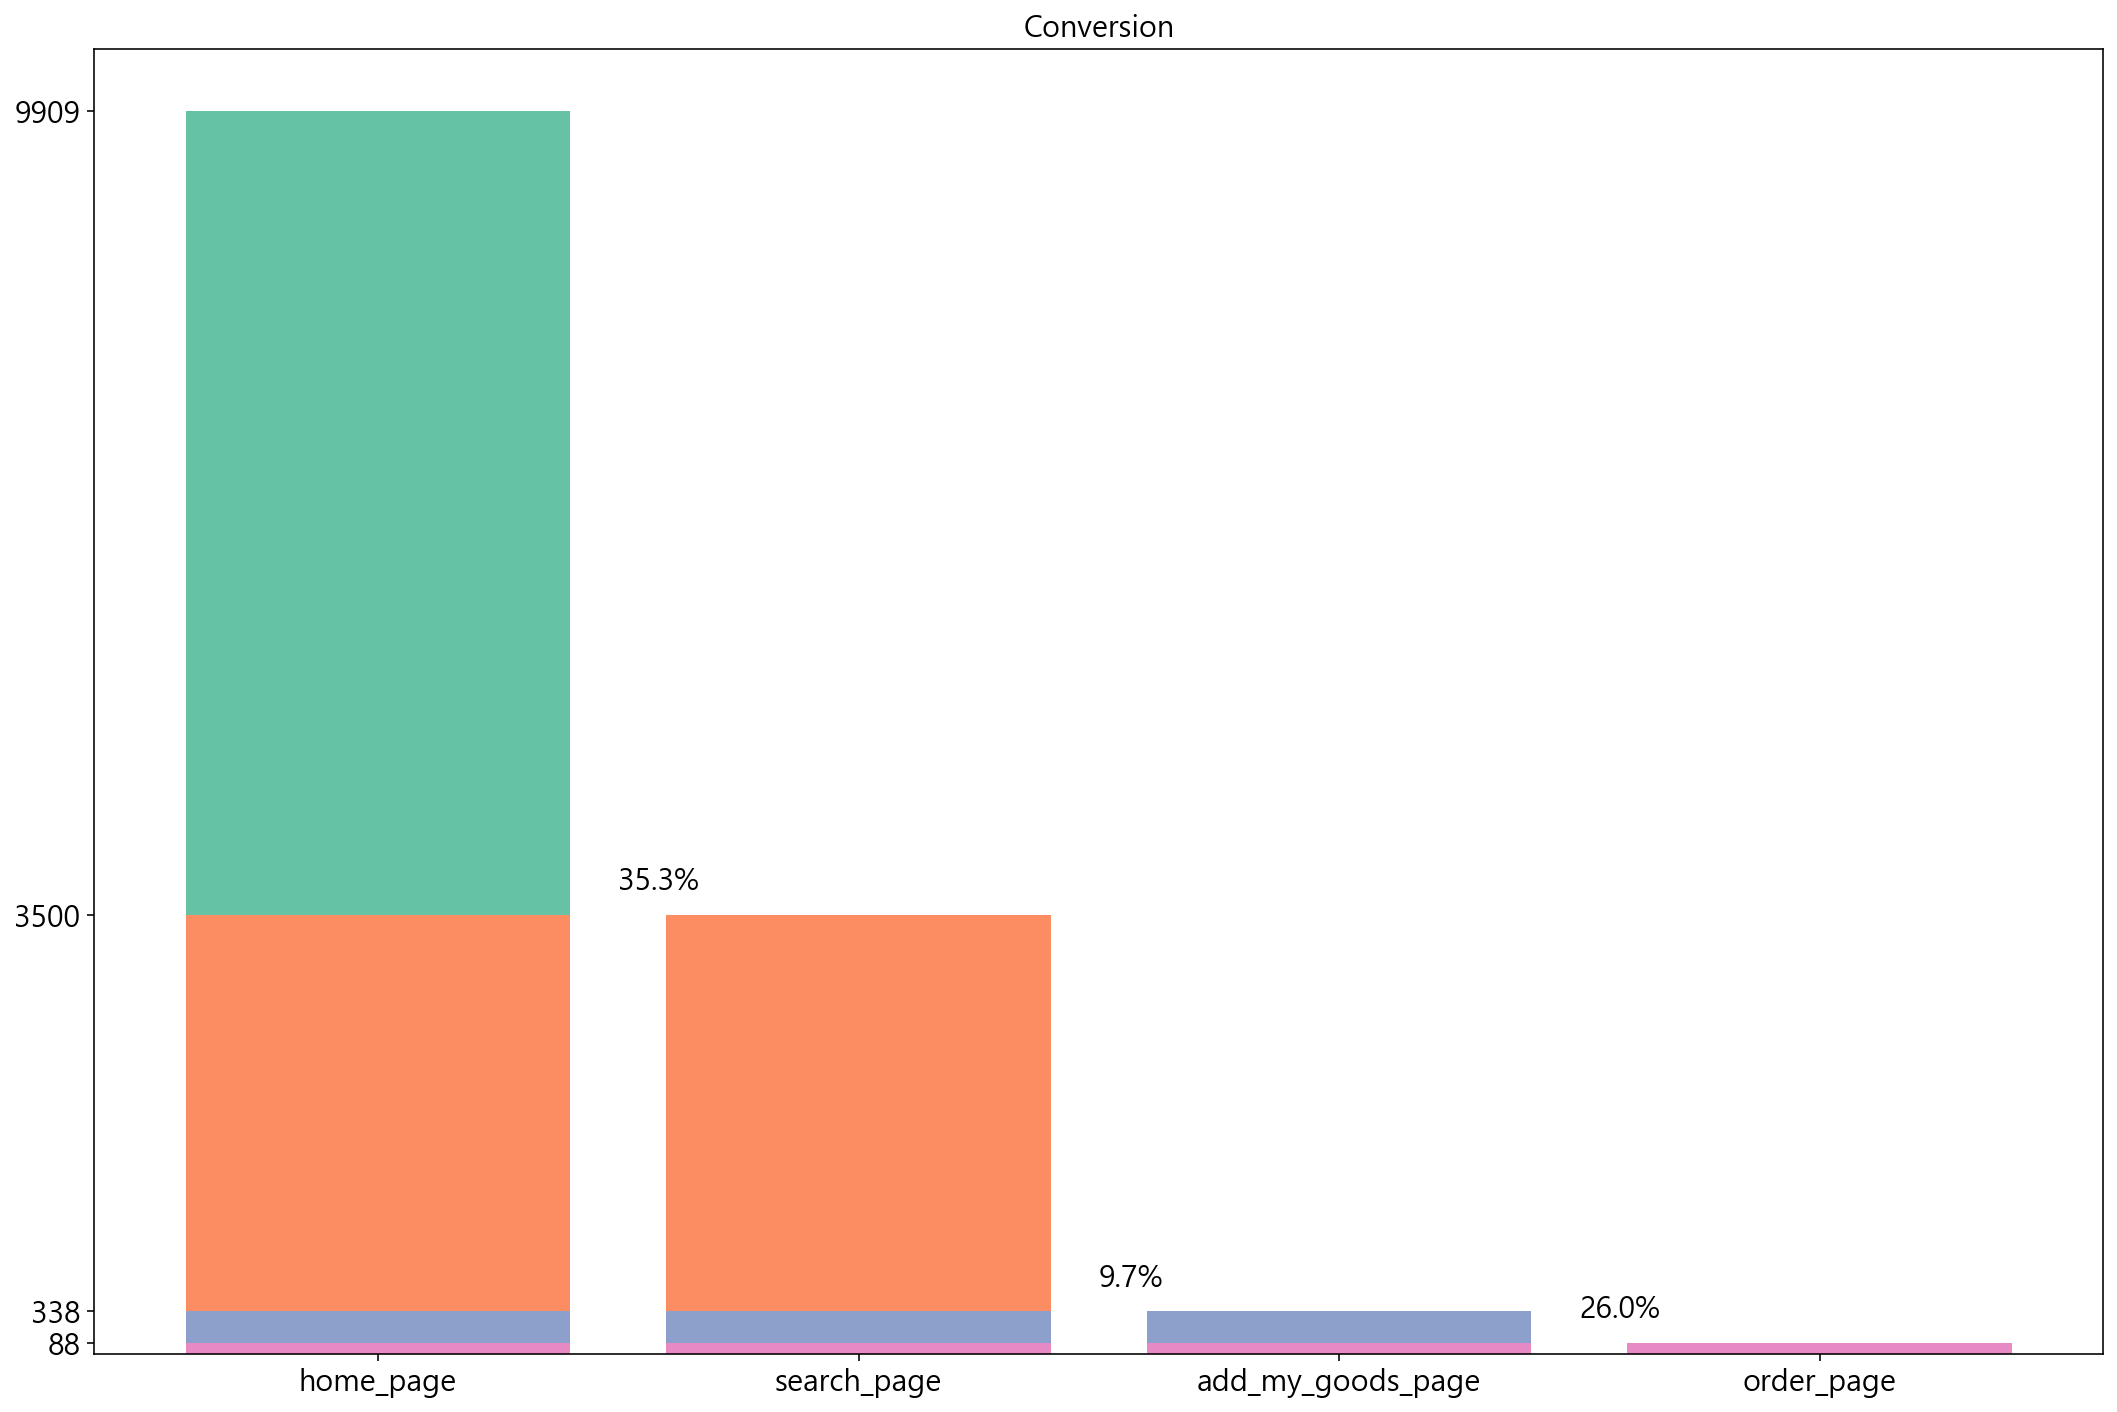

In [25]:
# 검색어로 검색한 이용자의 구매 전환율
conversion_rate("goods_search")

카테고리로 검색한 퍼널별 전환율이 **20.8%**(`home_page` -> `search_page`), **10.4%**(`search_page` -> `add_my_goods_page`),  **19.1%**(`add_my_goods_page` -> `order_page`)

검색어로 검색한 퍼널별 전환율이 **35.3%**(`home_page` -> `search_page`), **9.7%**(`search_page` -> `add_my_goods_page`),  **26.0%**(`add_my_goods_page` -> `order_page`)

로 계산됩니다. 검색어로 검색한 사람이 카테고리로 검색한 사람보다 상대적으로 많기는 하지만 장바구니에 담는 `add_my_goods_page`는 비율이 비슷하며 마지막 결제완료 페이지인 `order_page`에서는 차이가 생각보다 많이납니다 이는 사용자가 확실한 구매의사가 있을시에는 검색어로 검색후 바로 구매로 이어지는 경향과 비중이 더높다고 생각됨으로 이쪽부분을 개선하여 전환율을 높이면 최종 전환율도 높아질것으로 예상됩니다.